# Baseline mit einem Spieler


In [44]:
import locale

from helpers import colorboxplot, makeHistogram, getDataFromDB, getSettingsFromDB, colors

# %config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle

locale.setlocale(locale.LC_NUMERIC, "german")

mplstyle.use("fast")
mplstyle.use("default")
# mpl.rcParams['figure.figsize'] = [20, 10]




Pfad aus dem die Datenbanken geladen werden sollen.

In [45]:
db_dir = "D:/Uni/BA/data/"
db_filename = "gameHistories_baseline"

Lade Daten aus der Datenbank

In [46]:
roundCounts, stepCounts, winners, settingsIDs = getDataFromDB(db_dir, db_filename)
settings = getSettingsFromDB(db_dir,db_filename)

db load finished after 0:01:22.066459
sort finished after 0:00:01.971445
groupby finished after 0:00:02.454554
sort finished after 0:00:08.651365
split finished after 0:01:11.489927
settings loaded


Erstelle Label basierend auf den Einstellungen des jeweiligen Testsets

In [47]:
labels_unordered  = [ " vs ".join([p.getStrategy().getName()+" [{}]".format(p.getStoneCount()) for p in s[1]]) for s in settings]
labels = [labels_unordered[i] for i in settingsIDs]
labels


['random [1]',
 'random [2]',
 'random [3]',
 'random [4]',
 'random [5]',
 'random [6]',
 'random [7]']

## Ein Spielstein

Text(0.5, 1.0, 'Spiellänge in Schritten für einen Stein [10.500.000 Spiele]')

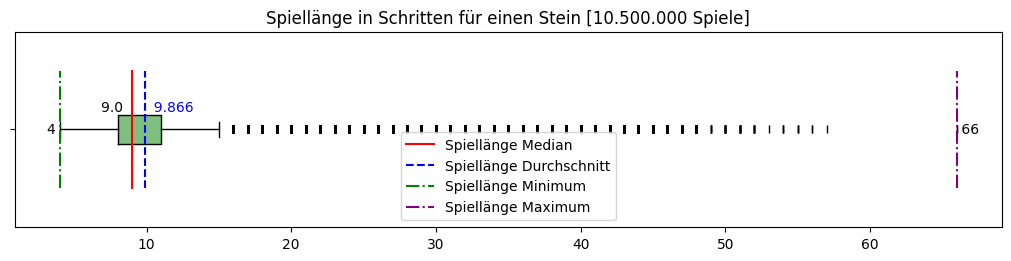

In [48]:
sc = stepCounts[0]
figSteps1p1s, ax = plt.subplot_mosaic([["Boxplots Schritte"]], figsize=[
    10, 2.5], layout="constrained")
# colorboxplot([[rc/(i+1) for rc in part]
#              for i, part in enumerate(stepCounts)], ax["Boxplots Schritte"], labels, colors)
colorboxplot([sc], ax["Boxplots Schritte"], [""], colors[0])
ax["Boxplots Schritte"].set_title(
    "Spiellänge in Schritten für einen Stein [{0:n} Spiele]".format(len(sc), grouping=True))


Text(0.5, 1.0, 'Spiellänge in Runden für einen Stein [10.500.000 Spiele]')

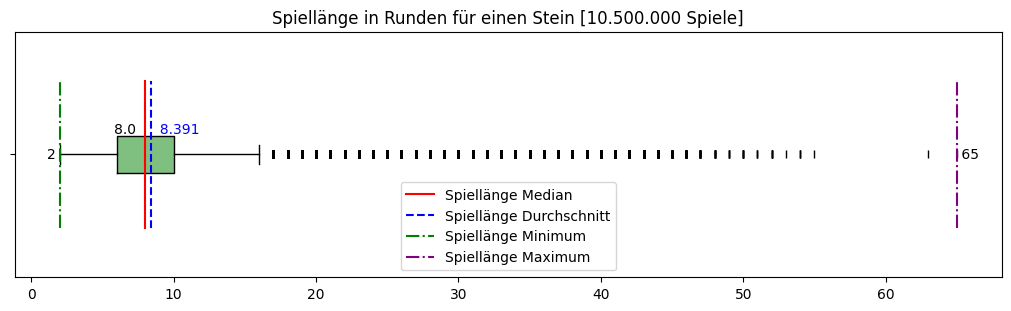

In [36]:
rc = roundCounts[0]
figRounds1p1s, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[
    10, 3], layout="constrained")
colorboxplot([rc], ax["Boxplots Runden"], [""], colors[0])
ax["Boxplots Runden"].set_title(
    "Spiellänge in Runden für einen Stein [{0:n} Spiele]".format(len(sc), grouping=True))


## 7 Spielsteine

Text(0.5, 1.0, 'Spiellänge in Schritten für sieben Steine [1.500.000 Spiele]')

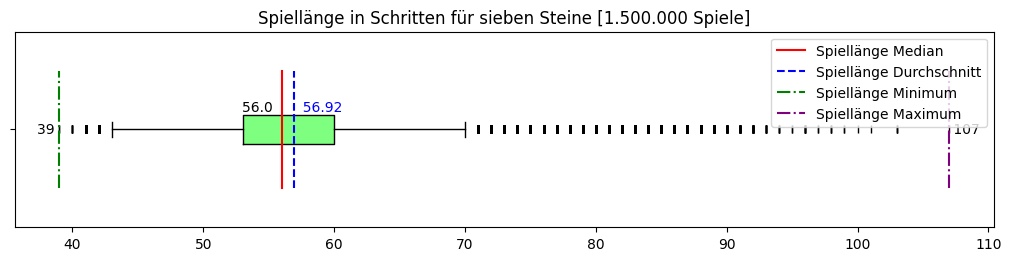

In [37]:
sc = stepCounts[6]
figSteps1p7s, ax = plt.subplot_mosaic([["Boxplots Schritte"]], figsize=[
    10, 2.5], layout="constrained")
# colorboxplot([[rc/(i+1) for rc in part]
#              for i, part in enumerate(stepCounts)], ax["Boxplots Schritte"], labels, colors)
colorboxplot([sc], ax["Boxplots Schritte"], [""], [colors[6]])
ax["Boxplots Schritte"].set_title(
    "Spiellänge in Schritten für sieben Steine [{0:n} Spiele]".format(len(sc), grouping=True))


Text(0.5, 1.0, 'Spiellänge in Runden für sieben Steine [1.500.000 Spiele]')

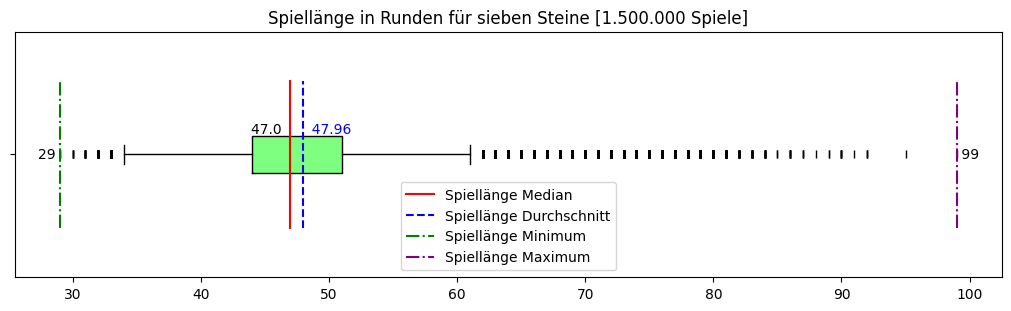

In [38]:
rc = roundCounts[6]
figRounds1p7s, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[
    10, 3], layout="constrained")
colorboxplot([rc], ax["Boxplots Runden"], [""], [colors[6]])
ax["Boxplots Runden"].set_title(
    "Spiellänge in Runden für sieben Steine [{0:n} Spiele]".format(len(sc), grouping=True))


## Alle Spielsteine 

Text(0.5, 1.0, 'Spiellänge in Schritten [1.500.000 Spiele]')

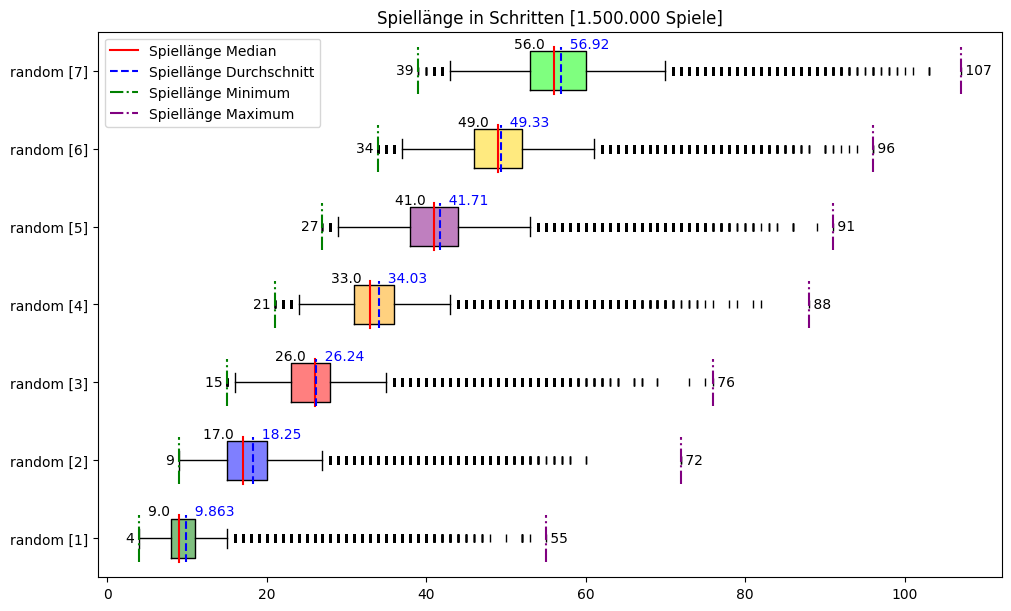

In [39]:
minlen = min([len(hset) for hset in stepCounts])
sc = [hset[:minlen] for hset in stepCounts]

figSteps1pAlls, ax = plt.subplot_mosaic([["Boxplots Schritte"]], figsize=[
    10, 6], layout="constrained")
colorboxplot(sc, ax["Boxplots Schritte"], labels, colors)
ax["Boxplots Schritte"].set_title(
    "Spiellänge in Schritten [{0:n} Spiele]".format(minlen, grouping=True))


Text(0.5, 1.0, 'Spiellänge in Runden [1.500.000 Spiele]')

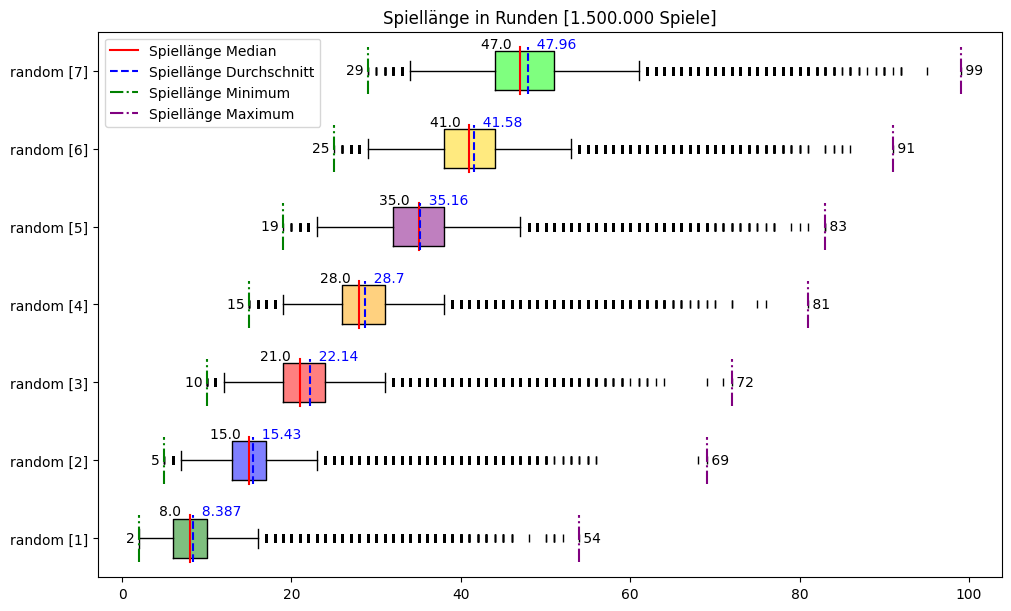

In [40]:
minlen = min([len(hset) for hset in roundCounts])
rc = [hset[:minlen] for hset in roundCounts]

figRounds1pAlls, ax = plt.subplot_mosaic([["Boxplots Schritte"]], figsize=[
    10, 6], layout="constrained")
colorboxplot(rc, ax["Boxplots Schritte"], labels, colors)
ax["Boxplots Schritte"].set_title(
    "Spiellänge in Runden [{0:n} Spiele]".format(minlen, grouping=True))


## Alle Spielsteine Durchschnittliche Zeit einen Stein ins Ziel zu bringen

Text(0.5, 1.0, 'Anzahl in Schritten für jeweils einen Spielstein [jeweils 10.500.000 Steine ins Ziel gebracht]')

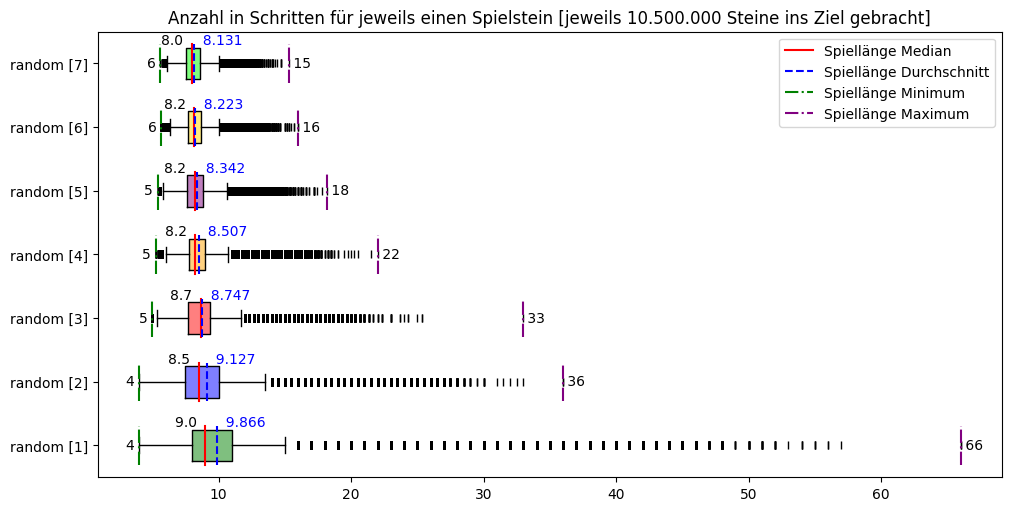

In [41]:
sc = [[gl/(i+1) for gl in hset] for i,hset in enumerate(stepCounts)]

figSteps1pStoneAvg, ax = plt.subplot_mosaic([["Boxplots Schritte"]], figsize=[
    10, 5], layout="constrained")
colorboxplot(sc, ax["Boxplots Schritte"], labels, colors)
ax["Boxplots Schritte"].set_title(
    "Anzahl in Schritten für jeweils einen Spielstein [jeweils {0:n} Steine ins Ziel gebracht]".format(len(stepCounts[0]), grouping=True))


Text(0.5, 1.0, 'Anzahl in Schritten für jeweils einen Spielstein [jeweils 10.500.000 Steine ins Ziel gebracht]')

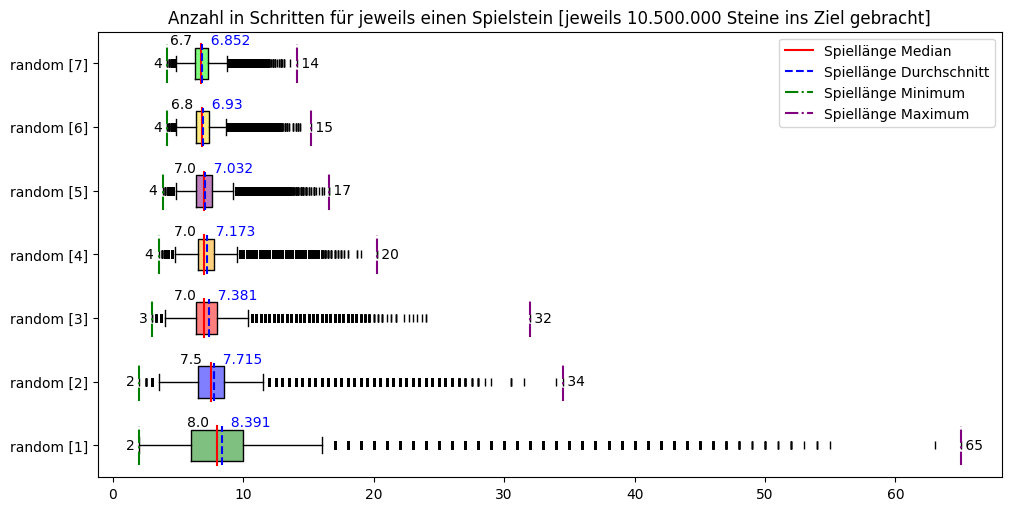

In [42]:
rc = [[gl/(i+1) for gl in hset] for i, hset in enumerate(roundCounts)]

figRounds1pStoneAvg, ax = plt.subplot_mosaic([["Boxplots Schritte"]], figsize=[
    10, 5], layout="constrained")
colorboxplot(rc, ax["Boxplots Schritte"], labels, colors)
ax["Boxplots Schritte"].set_title(
    "Anzahl in Schritten für jeweils einen Spielstein [jeweils {0:n} Steine ins Ziel gebracht]".format(len(roundCounts[0]), grouping=True))


## Speichern der Grafiken

In [43]:
figSteps1p1s.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline1s1pSchritte.png", dpi=300,)
figSteps1p7s.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline7s1pSchritte.png", dpi=300,)
figSteps1pAlls.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/BaselineAlls1pSchritte.png", dpi=300,)
figSteps1pStoneAvg.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/BaselineAvgs1pSchritte.png", dpi=300,)

figRounds1p1s.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline1s1pRunden.png", dpi=300,)
figRounds1p7s.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline7s1pRunden.png", dpi=300,)
figRounds1pAlls.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/BaselineAlls1pRunden.png", dpi=300,)
figRounds1pStoneAvg.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/BaselineAvgs1pRunden.png", dpi=300,)
